In [1]:
import time
import sys
import random
import matplotlib.pyplot as plt

## a)

In [2]:
def insertQ(Q,i,d):
    if (len(Q)==0):
        Q.append(i)
        
    else:
#         print(Q)
        for x in range (len(Q)):
            if d[Q[x]] >= d[i]:
                Q.insert(x,i)
                return
        Q.insert(len(Q),i)

def removeQ(Q,v):
    for x in range (len(Q)):
        if (v == Q[x]):
            Q.remove(v)
            return

In [3]:
def dijkstraArr(G, s):
    
    #initializing d , pi & set S to empty

    n = len(G)
    d = [sys.maxsize]*n
    pi = [None]*n
    S = [0]*n
    Q = []
    
    d[s] = 0
    
#     for i in range (n):
#         print(G[i])
        
    for i in range (n):
        if (i != s) and (G[s][i]):
                d[i] = G[s][i]
                pi[i] = s
                insertQ(Q,i,d)

    
    while (len(Q)):
        u = Q[0]
        Q.remove(u)
        S[u] = 1

        for v in range (n):
            if ((v != u) and ((G[v][u])) and (S[v] != 1) and (d[v] > (d[u] + G[v][u]))):
                removeQ(Q,v)
                d[v] = d[u] + G[v][u]
                pi[v] = u
                insertQ(Q,v,d)
                
#     print("////")
#     print("d",d)                
#     print("pi",pi)
#     print("S",S)
#     print("Q",Q)

## b)

In [4]:
def fixHeap(Q,i,d,x):
    if (len(Q)==0):
        Q.append(i)
        
    else:
        j = x
        if(x==0):
            cj = 1
        else:
            cj = 2*j
        Q.insert(x,0)
        while(cj<len(Q)):
            if(cj < (len(Q)-1)) and (d[Q[cj]] > d[Q[cj+1]]):
                cj = cj +1
            if(d[i] <= d[Q[cj]]):
                break
            Q[j] = Q[cj]
            j = cj
            cj = 2*j
        Q[j] = i

def deleteNode(Q,i,d):
    mini = Q.pop(i)
    if(len(Q)==0):
        return mini
    maxi = Q[-1]
    fixHeap(Q,maxi,d,i)
    Q.pop(-1)
    return mini

In [5]:
def dijkstraHeap(G, s):
    
    #initializing d , pi & set S to empty

    n = len(G)
    d = [sys.maxsize]*n
    pi = [None]*n
    S = [0]*n
    Q = []
    
    d[s] = 0
    
#     for i in range (n):
#         print(G[i])
        
    for i in range (n):
        if (i != s) and (G[s][i]):
                d[i] = G[s][i]
                pi[i] = s
                fixHeap(Q,i,d,0)

    while (len(Q)):
        u = deleteNode(Q,0,d)
        S[u] = 1
        
        for v in range (n):
            if ((v != u) and ((G[v][u])) and (S[v] != 1) and (d[v] > (d[u] + G[v][u]))):
                for i in range (len(Q)):
                    if(Q[i]==v):
                        deleteNode(Q,i,d)
                        break
                d[v] = d[u] + G[v][u]
                pi[v] = u
                fixHeap(Q,v,d,0)
                
#     print("////")
#     print("d",d)                
#     print("pi",pi)
#     print("S",S)
#     print("Q",Q)

In [7]:
#Generating random array


def ranArr(n):
    G = []
    for i in range (n):
        temp = []
        for x in range (n):
            temp.append(0)
        G.append(temp)


    for i in range (n):
        for x in range (i+1,n):
            G[i][x] = random.randint(0,10)
            G[x][i] = G[i][x]
        
        
    return G

In [14]:
## 

# Random array

import numpy as np
arr_size = []
arrTime = []
heapTime = []

# Loop through the array sizes
for j in range(1, 1001):
    # Array size is multiple of 5 from 5 to 5000 
#     x = j * 5
    G = ranArr(j)
    startArr = time.time()
    dijkstraArr(G,0)
    arrTime.append(time.time() - startArr)
    
    startHeap = time.time()
    dijkstraHeap(G,0)
    heapTime.append(time.time() - startHeap)
    
    arr_size.append(j)

    



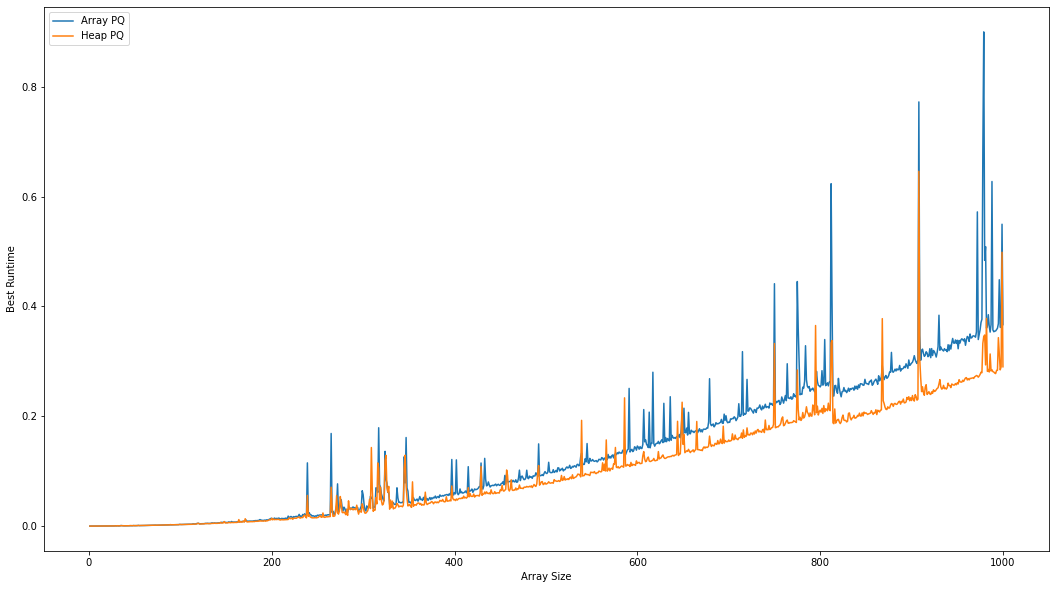

In [15]:
plt.rcParams["figure.figsize"] = (18,10)
plt.plot(arr_size, arrTime, label = "Array PQ")
plt.plot(arr_size, heapTime, label = "Heap PQ")
plt.legend()
plt.xlabel("Array Size")
plt.ylabel("Best Runtime")
plt.show()

In [ ]:
Q=[1,2,3]
Q.index(4)